In [1]:
import pandas as pd
import numpy as np
import sqlite3

# Reconnect to the database
conn = sqlite3.connect('./ipl_database.db')
# Query the database
df_ball = pd.read_sql_query('SELECT * FROM ipl_ball_by_ball;', conn)

# Display the first few rows of the table
print(df_ball)

# Close the connection
conn.close()


             ID  innings  overs  ballnumber       batter          bowler   
0       1312200        1      0           1  YBK Jaiswal  Mohammed Shami  \
1       1312200        1      0           2  YBK Jaiswal  Mohammed Shami   
2       1312200        1      0           3   JC Buttler  Mohammed Shami   
3       1312200        1      0           4  YBK Jaiswal  Mohammed Shami   
4       1312200        1      0           5  YBK Jaiswal  Mohammed Shami   
...         ...      ...    ...         ...          ...             ...   
225949   335982        2     14           5      P Kumar        I Sharma   
225950   335982        2     14           6     SB Joshi        I Sharma   
225951   335982        2     14           7      P Kumar        I Sharma   
225952   335982        2     15           1     SB Joshi       LR Shukla   
225953   335982        2     15           2     SB Joshi       LR Shukla   

        non-striker extra_type  batsman_run  extras_run  total_run   
0        JC Buttl

In [2]:
unique_bowlers = df_ball['bowler'].unique().tolist()

print(unique_bowlers)

['Mohammed Shami', 'Yash Dayal', 'LH Ferguson', 'Rashid Khan', 'HH Pandya', 'R Sai Kishore', 'TA Boult', 'M Prasidh Krishna', 'YS Chahal', 'OC McCoy', 'R Ashwin', 'Mohammed Siraj', 'JR Hazlewood', 'GJ Maxwell', 'Shahbaz Ahmed', 'HV Patel', 'PWH de Silva', 'Mohsin Khan', 'PVD Chameera', 'KH Pandya', 'Avesh Khan', 'Ravi Bishnoi', 'AS Joseph', 'LS Livingstone', 'Arshdeep Singh', 'K Rabada', 'NT Ellis', 'Harpreet Brar', 'B Kumar', 'Washington Sundar', 'Fazalhaq Farooqi', 'J Suchith', 'Umran Malik', 'R Shepherd', 'DR Sams', 'HR Shokeen', 'JJ Bumrah', 'M Markande', 'RP Meredith', 'Ramandeep Singh', 'KK Ahmed', 'A Nortje', 'SN Thakur', 'MR Marsh', 'Kuldeep Yadav', 'AR Patel', 'Mukesh Choudhary', 'Simarjeet Singh', 'MJ Santner', 'M Pathirana', 'MM Ali', 'PH Solanki', 'S Kaul', 'MK Lomror', 'UT Yadav', 'TG Southee', 'SP Narine', 'CV Varun', 'AD Russell', 'N Rana', 'JO Holder', 'K Gowtham', 'MP Stoinis', 'R Sanjay Yadav', 'T Natarajan', 'Abhishek Sharma', 'R Dhawan', 'RD Chahar', 'Lalit Yadav', 

In [3]:
import sqlite3
import pandas as pd

def get_bowler_stats(player_name):
    # Establish a connection to the SQLite database
    conn = sqlite3.connect('ipl_database.db')

    # Define the SQL query with the corrected syntax
    query = f'''
    SELECT
        innings,
        overs,
        SUM(CASE WHEN extra_type IS NULL OR extra_type = 'noballs' OR extra_type = 'wides' THEN total_run ELSE 0 END) AS runs_conceded,
        SUM((CASE WHEN isWicketDelivery = 1 AND kind != 'run out' THEN 1 ELSE 0 END)) AS wickets_taken,
        COUNT(CASE WHEN extra_type IS NULL OR extra_type LIKE "%byes%" THEN 1 END) AS balls_bowled
    FROM
        ipl_ball_by_ball
    WHERE
        bowler = ?
    GROUP BY
        innings,
        overs
    ORDER BY
        innings,
        overs;
    '''

    # Execute the query with the player name as a parameter
    df = pd.read_sql_query(query, conn, params=(player_name,))

    # Close the connection
    conn.close()

    return df

# Example usage
player_name = 'SL Malinga'
bowler_stats_df = get_bowler_stats(player_name)
bowler_stats_df

,innings,overs,runs_conceded,wickets_taken,balls_bowled
0,1,0,52,5,78
1,1,1,107,5,108
2,1,2,94,0,72
3,1,3,57,2,48
4,1,4,101,3,90
5,1,5,88,1,84
6,1,6,15,1,18
7,1,7,40,0,24
8,1,8,26,1,18
9,1,9,28,1,30


In [4]:
# Assuming you have a DataFrame named bowler_stats_df
# Filter the DataFrame based on innings, overs range, and runs scored
innings_x = 1  # Specify the innings
overs_y = 6  # Specify the starting over
overs_z = 10  # Specify the ending over

filtered_bowler_stats_df = bowler_stats_df[
    (bowler_stats_df['innings'].isin([1, 2])) &  # Filter by innings
    (bowler_stats_df['overs'] >= overs_y) &      # Filter by starting over
    (bowler_stats_df['overs'] <= overs_z)
]

# Print the filtered DataFrame
filtered_bowler_stats_df

,innings,overs,runs_conceded,wickets_taken,balls_bowled
6,1,6,15,1,18
7,1,7,40,0,24
8,1,8,26,1,18
9,1,9,28,1,30
10,1,10,59,1,36
26,2,7,27,0,24
27,2,9,13,1,12
28,2,10,33,0,30


In [5]:
def stat(player_name, bowler_stats_df, overs_y, overs_z):
    # Assuming you have a DataFrame named bowler_stats_df
    # Filter the DataFrame based on innings, overs range, and runs scored
     # Specify the ending over

    filtered_bowler_stats_df = bowler_stats_df[
        (bowler_stats_df['innings'].isin([1, 2])) &  # Filter by innings
        (bowler_stats_df['overs'] >= overs_y) &      # Filter by starting over
        (bowler_stats_df['overs'] <= overs_z)
    ]

    # Print the filtered DataFrame
    runs_score = filtered_bowler_stats_df["runs_conceded"].sum()
    balls_bowled = filtered_bowler_stats_df["balls_bowled"].sum()
    wickets = filtered_bowler_stats_df["wickets_taken"].sum()
    average = runs_score/wickets
    strike_rate = balls_bowled/wickets
    print(player_name)
    print(balls_bowled, wickets, average, strike_rate)

    return [player_name,wickets, balls_bowled, average, strike_rate]

stat("SL Malinga", get_bowler_stats("SL Malinga"), 0, 19)

SL Malinga
2827 170 19.788235294117648 16.629411764705882


['SL Malinga', 170, 2827, 19.788235294117648, 16.629411764705882]

In [6]:
def bowling_stats_overs(player_name, bowler_stats_df, overs_y, overs_z):
    # Assuming you have a DataFrame named bowler_stats_df
    # Filter the DataFrame based on innings, overs range, and runs scored
     # Specify the ending over

    filtered_bowler_stats_df = bowler_stats_df[
        (bowler_stats_df['innings'].isin([1, 2])) &  # Filter by innings
        (bowler_stats_df['overs'] >= overs_y) &      # Filter by starting over
        (bowler_stats_df['overs'] <= overs_z)
    ]

    # Print the filtered DataFrame
    runs_score = filtered_bowler_stats_df["runs_conceded"].sum()
    balls_bowled = filtered_bowler_stats_df["balls_bowled"].sum()
    wickets = filtered_bowler_stats_df["wickets_taken"].sum()
    average = runs_score/wickets
    strike_rate = balls_bowled/wickets
    economy = (runs_score*6)/balls_bowled


    return [player_name, wickets, balls_bowled, average, strike_rate, economy]

bowling_stats_overs("SL Malinga", get_bowler_stats("SL Malinga"), 0, 19)

['SL Malinga',
 170,
 2827,
 19.788235294117648,
 16.629411764705882,
 7.139724089140431]

# Best Bowlers in the Powerplay

In [7]:
bowling_power_play = []
for i in unique_bowlers:
    df = get_bowler_stats(i)
    bowling_power_play.append(bowling_stats_overs(i, df, 0, 5))

C:\Users\anubr\AppData\Local\Temp\ipykernel_23804\1093751411.py:16: RuntimeWarning: invalid value encountered in scalar divide
  average = runs_score/wickets
C:\Users\anubr\AppData\Local\Temp\ipykernel_23804\1093751411.py:17: RuntimeWarning: invalid value encountered in scalar divide
  strike_rate = balls_bowled/wickets
C:\Users\anubr\AppData\Local\Temp\ipykernel_23804\1093751411.py:18: RuntimeWarning: invalid value encountered in scalar divide
  economy = (runs_score*6)/balls_bowled
C:\Users\anubr\AppData\Local\Temp\ipykernel_23804\1093751411.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  average = runs_score/wickets
C:\Users\anubr\AppData\Local\Temp\ipykernel_23804\1093751411.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  strike_rate = balls_bowled/wickets


In [8]:
bowling_power_play

[['Mohammed Shami',
  29,
  1074,
  46.3448275862069,
  37.03448275862069,
  7.5083798882681565],
 ['Yash Dayal', 5, 90, 28.0, 18.0, 9.333333333333334],
 ['LH Ferguson', 13, 210, 22.076923076923077, 16.153846153846153, 8.2],
 ['Rashid Khan', 9, 192, 26.88888888888889, 21.333333333333332, 7.5625],
 ['HH Pandya',
  7,
  222,
  44.142857142857146,
  31.714285714285715,
  8.35135135135135],
 ['R Sai Kishore', 0, 0, nan, nan, nan],
 ['TA Boult', 40, 1044, 30.85, 26.1, 7.091954022988506],
 ['M Prasidh Krishna',
  14,
  529,
  49.57142857142857,
  37.785714285714285,
  7.871455576559546],
 ['YS Chahal', 16, 386, 32.125, 24.125, 7.989637305699482],
 ['OC McCoy', 0, 12, inf, inf, 7.0],
 ['R Ashwin',
  46,
  1054,
  25.26086956521739,
  22.91304347826087,
  6.614800759013283],
 ['Mohammed Siraj',
  21,
  594,
  40.61904761904762,
  28.285714285714285,
  8.616161616161616],
 ['JR Hazlewood', 12, 318, 32.166666666666664, 26.5, 7.283018867924528],
 ['GJ Maxwell', 6, 180, 44.833333333333336, 30.0, 8

In [9]:
bowling_power_play_df = pd.DataFrame(bowling_power_play, columns=['player_name', 'wickets', 'balls_bowled', 'average', 'strike_rate','economy'])
bowling_power_play_df

,player_name,wickets,balls_bowled,average,strike_rate,economy
0,Mohammed Shami,29,1074,46.344828,37.034483,7.508380
1,Yash Dayal,5,90,28.000000,18.000000,9.333333
2,LH Ferguson,13,210,22.076923,16.153846,8.200000
3,Rashid Khan,9,192,26.888889,21.333333,7.562500
4,HH Pandya,7,222,44.142857,31.714286,8.351351
...,...,...,...,...,...,...
467,LPC Silva,0,0,NaN,NaN,NaN
468,D Kalyankrishna,0,0,NaN,NaN,NaN
469,SB Joshi,0,0,NaN,NaN,NaN
470,MA Khote,0,0,NaN,NaN,NaN


In [10]:
sorted_bowling_powerplay_df = bowling_power_play_df.sort_values('wickets', ascending=False)
filtered_sorted_bowling_powerplay_df = sorted_bowling_powerplay_df.query('wickets >= 20').dropna()
print(len(filtered_sorted_bowling_powerplay_df))
filtered_sorted_bowling_powerplay_df

35


,player_name,wickets,balls_bowled,average,strike_rate,economy
28,B Kumar,55,1745,31.890909,31.727273,6.030946
84,Sandeep Sharma,54,1374,29.148148,25.444444,6.873362
221,Z Khan,53,1292,27.396226,24.377358,6.743034
54,UT Yadav,53,1260,29.849057,23.773585,7.533333
10,R Ashwin,46,1054,25.260870,22.913043,6.614801
147,I Sharma,44,1263,33.909091,28.704545,7.087886
148,DS Kulkarni,44,1018,28.886364,23.136364,7.491159
126,DL Chahar,43,1021,30.697674,23.744186,7.757101
6,TA Boult,40,1044,30.850000,26.100000,7.091954
224,P Kumar,40,1572,43.850000,39.300000,6.694656


In [11]:
# Reset index of filtered_sorted_bowling_powerplay_df
filtered_sorted_bowling_powerplay_df = filtered_sorted_bowling_powerplay_df.reset_index(drop=True)
len(filtered_sorted_bowling_powerplay_df)

35

In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the data
data = filtered_sorted_bowling_powerplay_df
# Handle missing values
data = data.dropna()

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data[['wickets', 'balls_bowled', 'average', 'strike_rate','economy']])

# Create and train the neural network
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(5,)))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse')
model.fit(X, X, epochs=100, batch_size=32, verbose=0)

# Inspect the model's summary to find the correct layer name
model.summary()

encoder = tf.keras.Model(model.input, model.layers[-2].output)
print(encoder)
encoded_data = encoder.predict(X)
print("encoder data")
print(encoded_data)
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(encoded_data)

# Assign the cluster labels back to the original data
data['Cluster'] = labels





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                192       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)              

c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
type(encoded_data)

numpy.ndarray

In [14]:
encoded_data.shape

(35, 8)

In [15]:
# Assuming 'data' is your DataFrame
sorted_data = data.sort_values(by='Cluster', ascending=False)

# Display the sorted DataFrame
sorted_data

,player_name,wickets,balls_bowled,average,strike_rate,economy,Cluster
17,DW Steyn,34,1134,34.823529,33.352941,6.264550,2
14,MM Sharma,35,798,30.228571,22.800000,7.954887,2
24,IK Pathan,28,918,38.642857,32.785714,7.071895,2
23,Mohammed Shami,29,1074,46.344828,37.034483,7.508380,2
28,SP Narine,24,834,38.125000,34.750000,6.582734,2
29,JD Unadkat,23,702,38.173913,30.521739,7.504274,2
30,K Rabada,22,576,34.363636,26.181818,7.875000,2
31,CH Morris,21,678,40.571429,32.285714,7.539823,2
18,AB Dinda,33,810,30.030303,24.545455,7.340741,2
1,Sandeep Sharma,54,1374,29.148148,25.444444,6.873362,2


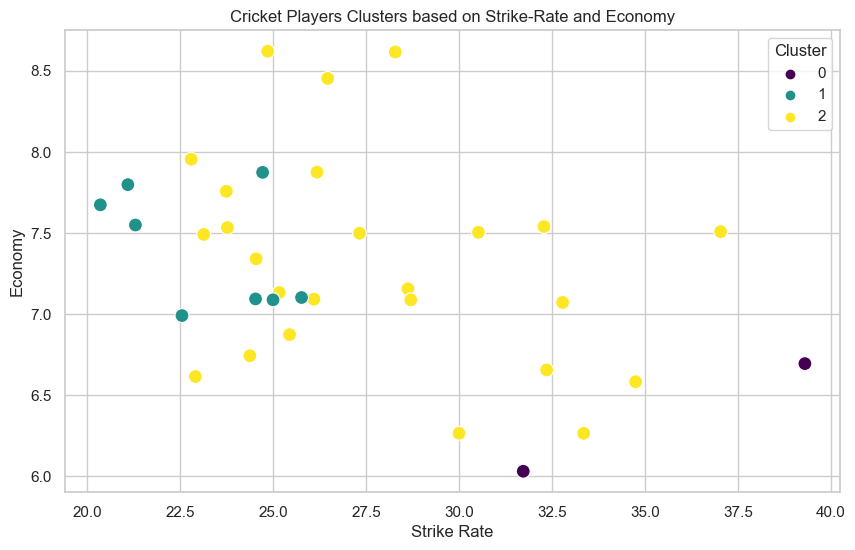

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with 'average' on the x-axis and 'strike_rate' on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='strike_rate', y='economy', hue='Cluster', data=sorted_data, palette='viridis', s=100)

# Set the title and labels of the plot
plt.title('Cricket Players Clusters based on Strike-Rate and Economy')
plt.xlabel('Strike Rate')
plt.ylabel('Economy')

# Show the plot
plt.legend(title='Cluster')
plt.show()

In [17]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Assuming 'data' is your DataFrame and 'X' is the standardized input features
data = filtered_sorted_bowling_powerplay_df
# Handle missing values
data = data.dropna()

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data[['wickets', 'average', 'strike_rate','economy']])
# Define the size of the encoding
encoding_dim = 2  # This is the size of our encoded representations (bottleneck)

# Define the input layer with the same number of neurons as the input features
input_data = Input(shape=(4,))

# "encoded" is the encoded representation of the input
encoded = Dense(32, activation='relu')(input_data)
encoded = Dense(16, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)  # Bottleneck layer

# "decoded" is the lossy reconstruction of the input
decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(4, activation='linear')(decoded)  # Output layer with same size as input

# This model maps an input to its reconstruction
autoencoder = Model(input_data, decoded)

# This model maps an input to its encoded representation
encoder = Model(input_data, encoded)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X, X,
                epochs=100,
                batch_size=32,
                shuffle=True,
                verbose=0)

# Use the encoder to encode the data
encoded_data = encoder.predict(X)

# Apply K-Means clustering on the encoded data
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(encoded_data)

# Assign the cluster labels back to the original DataFrame
data['Cluster'] = labels

2/2 [==============================] - 0s 3ms/step


c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
# Assuming 'data' is your DataFrame
sorted_data = data.sort_values(by='Cluster', ascending=False)

# Display the sorted DataFrame
sorted_data

,player_name,wickets,balls_bowled,average,strike_rate,economy,Cluster
17,DW Steyn,34,1134,34.823529,33.352941,6.264550,2
11,SL Malinga,37,1110,31.324324,30.000000,6.264865,2
26,S Sreesanth,28,570,26.035714,20.357143,7.673684,2
22,MM Patel,29,654,26.275862,22.551724,6.990826,2
21,R Vinay Kumar,30,750,29.533333,25.000000,7.088000,2
19,MJ McClenaghan,31,654,27.419355,21.096774,7.798165,2
18,AB Dinda,33,810,30.030303,24.545455,7.340741,2
16,SR Watson,34,834,29.000000,24.529412,7.093525,2
14,MM Sharma,35,798,30.228571,22.800000,7.954887,2
12,M Morkel,36,906,29.916667,25.166667,7.132450,2


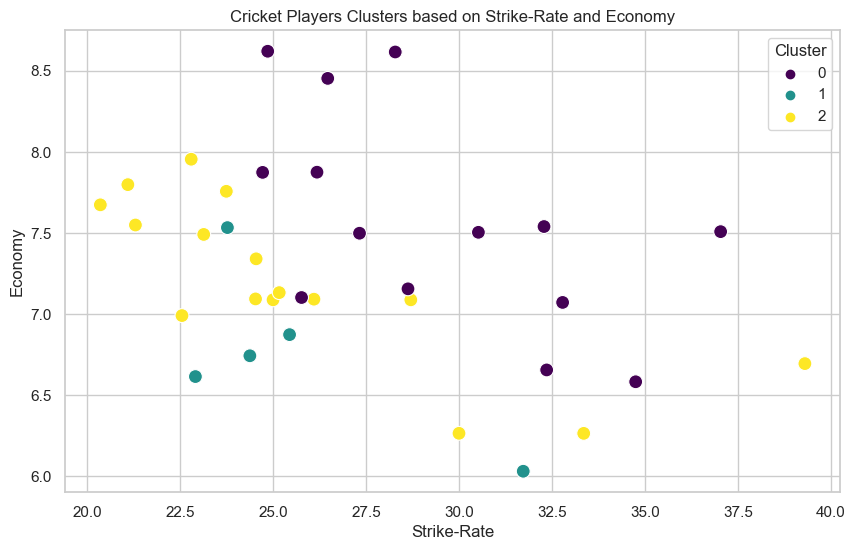

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with 'average' on the x-axis and 'strike_rate' on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='strike_rate', y='economy', hue='Cluster', data=sorted_data, palette='viridis', s=100)

# Set the title and labels of the plot
plt.title('Cricket Players Clusters based on Strike-Rate and Economy')
plt.xlabel('Strike-Rate')
plt.ylabel('Economy')

# Show the plot
plt.legend(title='Cluster')
plt.show()

In [20]:
filtered_sorted_bowling_powerplay_df.columns

Index(['player_name', 'wickets', 'balls_bowled', 'average', 'strike_rate',
       'economy'],
      dtype='object')

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
# Normalize the data
scaler = MinMaxScaler()
sorted_data = sorted_data.reset_index(drop=True)
filtered_sorted_bowling_powerplay_df = sorted_data
normalized_data = scaler.fit_transform(filtered_sorted_bowling_powerplay_df[['wickets', 'average', 'strike_rate','economy']])

# Define weights for the composite score
w0 = 0.4
w1 = -0.2
w2 = -0.8
w3 = -0.5


# Create a new column for the composite score
filtered_sorted_bowling_powerplay_df['performance'] = (
    w0 * normalized_data[:, 0] +
    w1 * normalized_data[:, 1] +
    w2 * normalized_data[:, 2] + 
    w3 * normalized_data[:, 3]

)

# Split the data into features and target variable
X = normalized_data
y = filtered_sorted_bowling_powerplay_df["performance"]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(4,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear')) 

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)


print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")

print(f"Test Loss: {loss:.4f}")
print(f"Test MSE: {accuracy:.4f}")

Epoch 1/100

1/1 [==============================] - 1s 696ms/step - loss: 0.1986 - mse: 0.1986
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1719 - mse: 0.1719
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1480 - mse: 0.1480
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1266 - mse: 0.1266
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1076 - mse: 0.1076
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0910 - mse: 0.0910
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0768 - mse: 0.0768
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0645 - mse: 0.0645
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0543 - mse: 0.0543
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0458 - mse: 0.0458
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 0.03

1/1 [==============================] - 0s 16ms/step


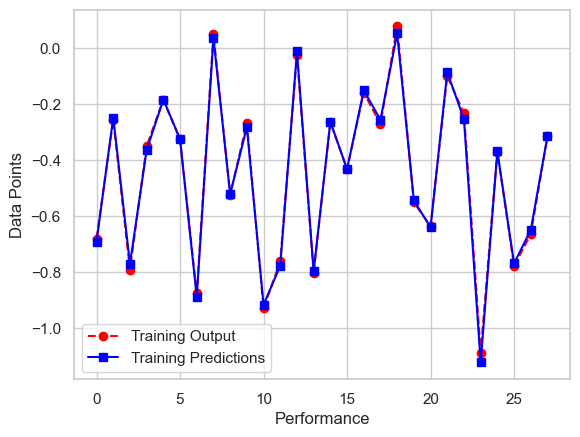

In [22]:
import matplotlib.pyplot as plt
plt.plot(np.array(y_train), label='Training Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(model.predict(X_train)), label='Training Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()

1/1 [==============================] - 0s 15ms/step


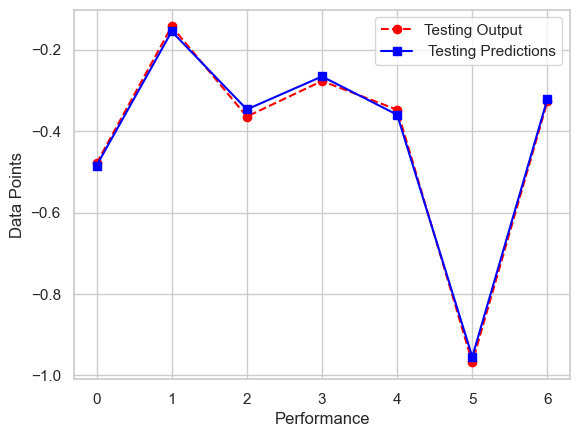

In [23]:
import matplotlib.pyplot as plt
plt.plot(np.array(y_test), label='Testing Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(model.predict(X_test)), label=' Testing Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()

2/2 [==============================] - 0s 2ms/step


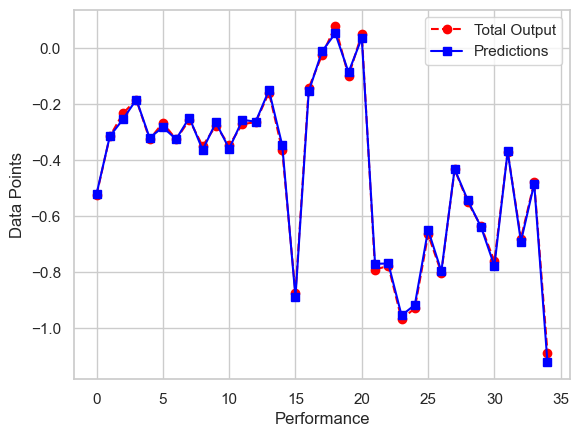

In [24]:
import matplotlib.pyplot as plt
plt.plot(np.array(y), label='Total Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(model.predict(X)), label='Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()

In [25]:
predictions

array([[-0.48488504],
       [-0.15530401],
       [-0.3468507 ],
       [-0.26590022],
       [-0.3598864 ],
       [-0.95436215],
       [-0.32072875]], dtype=float32)

In [26]:
len(predictions)

7

In [27]:
output_players_performance = model.predict(X)
print(output_players_performance)

2/2 [==============================] - 0s 1ms/step
[[-0.52123284]
 [-0.31551096]
 [-0.25420204]
 [-0.1841534 ]
 [-0.32072875]
 [-0.28300947]
 [-0.3256469 ]
 [-0.24839024]
 [-0.36435246]
 [-0.26590022]
 [-0.3598864 ]
 [-0.25670847]
 [-0.26319513]
 [-0.15127923]
 [-0.3468507 ]
 [-0.8889936 ]
 [-0.15530401]
 [-0.01243856]
 [ 0.05168492]
 [-0.08696824]
 [ 0.03546944]
 [-0.7701788 ]
 [-0.76913935]
 [-0.95436215]
 [-0.91660875]
 [-0.6492963 ]
 [-0.79718864]
 [-0.4323003 ]
 [-0.54419494]
 [-0.6401709 ]
 [-0.7773917 ]
 [-0.3691766 ]
 [-0.6908591 ]
 [-0.48488507]
 [-1.1221222 ]]


In [28]:
len(output_players_performance)

35

In [29]:
filtered_sorted_bowling_powerplay_df

,player_name,wickets,balls_bowled,average,strike_rate,economy,Cluster,performance
0,DW Steyn,34,1134,34.823529,33.352941,6.264550,2,-0.524654
1,SL Malinga,37,1110,31.324324,30.000000,6.264865,2,-0.315634
2,S Sreesanth,28,570,26.035714,20.357143,7.673684,2,-0.233084
3,MM Patel,29,654,26.275862,22.551724,6.990826,2,-0.184776
4,R Vinay Kumar,30,750,29.533333,25.000000,7.088000,2,-0.326406
5,MJ McClenaghan,31,654,27.419355,21.096774,7.798165,2,-0.267193
6,AB Dinda,33,810,30.030303,24.545455,7.340741,2,-0.326434
7,SR Watson,34,834,29.000000,24.529412,7.093525,2,-0.256825
8,MM Sharma,35,798,30.228571,22.800000,7.954887,2,-0.350316
9,M Morkel,36,906,29.916667,25.166667,7.132450,2,-0.277091


# Best Bowlers In the Powerplay

In [30]:
import pandas as pd

# Create a new dataframe from the array
performance_df = pd.DataFrame(output_players_performance, columns=['Predicted Performance'])

# Concatenate the two dataframes along the column axis
merged_bowling_powerplay_df = pd.concat([filtered_sorted_bowling_powerplay_df, performance_df], axis=1)
merged_bowling_powerplay_df = merged_bowling_powerplay_df.sort_values('Predicted Performance', ascending=False)
merged_bowling_powerplay_df = merged_bowling_powerplay_df.reset_index(drop=True)
merged_bowling_powerplay_df

,player_name,wickets,balls_bowled,average,strike_rate,economy,Cluster,performance,Predicted Performance
0,R Ashwin,46,1054,25.260870,22.913043,6.614801,1,0.076477,0.051685
1,Z Khan,53,1292,27.396226,24.377358,6.743034,1,0.049622,0.035469
2,Sandeep Sharma,54,1374,29.148148,25.444444,6.873362,1,-0.025796,-0.012439
3,UT Yadav,53,1260,29.849057,23.773585,7.533333,1,-0.100729,-0.086968
4,DS Kulkarni,44,1018,28.886364,23.136364,7.491159,2,-0.159400,-0.151279
5,B Kumar,55,1745,31.890909,31.727273,6.030946,1,-0.143078,-0.155304
6,MM Patel,29,654,26.275862,22.551724,6.990826,2,-0.184776,-0.184153
7,SR Watson,34,834,29.000000,24.529412,7.093525,2,-0.256825,-0.248390
8,S Sreesanth,28,570,26.035714,20.357143,7.673684,2,-0.233084,-0.254202
9,TA Boult,40,1044,30.850000,26.100000,7.091954,2,-0.271828,-0.256708


# bowling Middle Overs Part 1

In [31]:
bowling_middle_one = []
for i in unique_bowlers:
    bowling_middle_one.append(bowling_stats_overs(i, get_bowler_stats(i), 6, 10))

C:\Users\anubr\AppData\Local\Temp\ipykernel_23804\1093751411.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  average = runs_score/wickets
C:\Users\anubr\AppData\Local\Temp\ipykernel_23804\1093751411.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  strike_rate = balls_bowled/wickets
C:\Users\anubr\AppData\Local\Temp\ipykernel_23804\1093751411.py:16: RuntimeWarning: invalid value encountered in scalar divide
  average = runs_score/wickets
C:\Users\anubr\AppData\Local\Temp\ipykernel_23804\1093751411.py:17: RuntimeWarning: invalid value encountered in scalar divide
  strike_rate = balls_bowled/wickets
C:\Users\anubr\AppData\Local\Temp\ipykernel_23804\1093751411.py:18: RuntimeWarning: invalid value encountered in scalar divide
  economy = (runs_score*6)/balls_bowled


In [32]:
bowling_middle_one

[['Mohammed Shami', 3, 162, 71.33333333333333, 54.0, 7.925925925925926],
 ['Yash Dayal', 2, 24, 13.5, 12.0, 6.75],
 ['LH Ferguson', 4, 192, 52.75, 48.0, 6.59375],
 ['Rashid Khan', 34, 918, 26.5, 27.0, 5.888888888888889],
 ['HH Pandya',
  11,
  324,
  36.54545454545455,
  29.454545454545453,
  7.444444444444445],
 ['R Sai Kishore', 3, 48, 15.666666666666666, 16.0, 5.875],
 ['TA Boult', 5, 60, 14.4, 12.0, 7.2],
 ['M Prasidh Krishna', 3, 102, 49.0, 34.0, 8.647058823529411],
 ['YS Chahal',
  57,
  1225,
  24.36842105263158,
  21.49122807017544,
  6.803265306122449],
 ['OC McCoy',
  3,
  55,
  31.666666666666668,
  18.333333333333332,
  10.363636363636363],
 ['R Ashwin',
  39,
  1343,
  37.84615384615385,
  34.43589743589744,
  6.594192107222636],
 ['Mohammed Siraj', 3, 162, 63.333333333333336, 54.0, 7.037037037037037],
 ['JR Hazlewood', 1, 12, 16.0, 12.0, 8.0],
 ['GJ Maxwell', 12, 324, 34.25, 27.0, 7.611111111111111],
 ['Shahbaz Ahmed', 5, 150, 44.0, 30.0, 8.8],
 ['HV Patel', 16, 438, 35.2

In [33]:
bowling_middle_one_df = pd.DataFrame(bowling_middle_one, columns=['player_name', 'wickets', 'balls_bowled', 'average', 'strike_rate','economy'])
bowling_middle_one_df

,player_name,wickets,balls_bowled,average,strike_rate,economy
0,Mohammed Shami,3,162,71.333333,54.000000,7.925926
1,Yash Dayal,2,24,13.500000,12.000000,6.750000
2,LH Ferguson,4,192,52.750000,48.000000,6.593750
3,Rashid Khan,34,918,26.500000,27.000000,5.888889
4,HH Pandya,11,324,36.545455,29.454545,7.444444
...,...,...,...,...,...,...
467,LPC Silva,0,0,NaN,NaN,NaN
468,D Kalyankrishna,2,18,9.000000,9.000000,6.000000
469,SB Joshi,0,18,inf,inf,7.666667
470,MA Khote,0,0,NaN,NaN,NaN


In [34]:
sorted_bowling_middle_one_df = bowling_middle_one_df.sort_values('wickets', ascending=False)
filtered_sorted_bowling_middle_one_df = sorted_bowling_middle_one_df.query('wickets >= 20').dropna()
print(len(filtered_sorted_bowling_middle_one_df))
filtered_sorted_bowling_middle_one_df

23


,player_name,wickets,balls_bowled,average,strike_rate,economy
150,A Mishra,73,1609,24.178082,22.041096,6.581728
157,Harbhajan Singh,58,1524,29.672414,26.275862,6.775591
8,YS Chahal,57,1225,24.368421,21.491228,6.803265
146,PP Chawla,52,1434,34.711538,27.576923,7.552301
90,RA Jadeja,49,1530,37.530612,31.224490,7.211765
10,R Ashwin,39,1343,37.846154,34.435897,6.594192
45,AR Patel,38,1104,32.026316,29.052632,6.614130
284,PP Ojha,36,852,25.611111,23.666667,6.492958
3,Rashid Khan,34,918,26.500000,27.000000,5.888889
67,RD Chahar,32,606,24.093750,18.937500,7.633663


In [35]:
# Reset index of filtered_sorted_bowling_powerplay_df
filtered_sorted_bowling_middle_one_df = filtered_sorted_bowling_middle_one_df.reset_index(drop=True)
len(filtered_sorted_bowling_middle_one_df)

23

In [36]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the data
data = filtered_sorted_bowling_middle_one_df
# Handle missing values
data = data.dropna()

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data[['wickets', 'average', 'strike_rate','economy']])

# Create and train the neural network
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(4,)))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse')
model.fit(X, X, epochs=100, batch_size=32, verbose=0)

# Inspect the model's summary to find the correct layer name
model.summary()

encoder = tf.keras.Model(model.input, model.layers[-2].output)
print(encoder)
encoded_data = encoder.predict(X)
print("encoder data")
print(encoded_data)
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(encoded_data)

# Assign the cluster labels back to the original data
data['Cluster'] = labels

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 32)                160       
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_15 (Dense)            (None, 8)                 136       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_16 (Dense)            (None, 1)                

c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [37]:
type(encoded_data)

numpy.ndarray

In [38]:
encoded_data.shape

(23, 8)

In [39]:
# Assuming 'data' is your DataFrame
sorted_data = data.sort_values(by='Cluster', ascending=False)

# Display the sorted DataFrame
sorted_data

,player_name,wickets,balls_bowled,average,strike_rate,economy,Cluster
11,SP Narine,28,816,28.750000,29.142857,5.919118,2
7,PP Ojha,36,852,25.611111,23.666667,6.492958,2
8,Rashid Khan,34,918,26.500000,27.000000,5.888889,2
17,SK Warne,23,594,28.391304,25.826087,6.595960,2
3,PP Chawla,52,1434,34.711538,27.576923,7.552301,1
4,RA Jadeja,49,1530,37.530612,31.224490,7.211765,1
5,R Ashwin,39,1343,37.846154,34.435897,6.594192,1
19,KH Pandya,21,762,42.476190,36.285714,7.023622,1
1,Harbhajan Singh,58,1524,29.672414,26.275862,6.775591,1
15,Kuldeep Yadav,24,618,34.958333,25.750000,8.145631,0


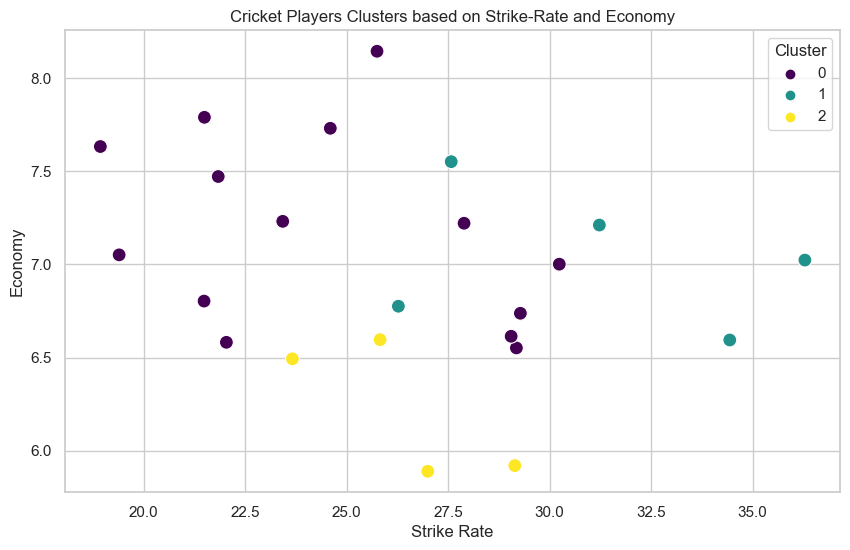

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with 'average' on the x-axis and 'strike_rate' on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='strike_rate', y='economy', hue='Cluster', data=sorted_data, palette='viridis', s=100)

# Set the title and labels of the plot
plt.title('Cricket Players Clusters based on Strike-Rate and Economy')
plt.xlabel('Strike Rate')
plt.ylabel('Economy')

# Show the plot
plt.legend(title='Cluster')
plt.show()

In [41]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Assuming 'data' is your DataFrame and 'X' is the standardized input features
data = filtered_sorted_bowling_middle_one_df
# Handle missing values
data = data.dropna()

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data[['wickets', 'average', 'strike_rate','economy']])
# Define the size of the encoding
encoding_dim = 2  # This is the size of our encoded representations (bottleneck)

# Define the input layer with the same number of neurons as the input features
input_data = Input(shape=(4,))

# "encoded" is the encoded representation of the input
encoded = Dense(32, activation='relu')(input_data)
encoded = Dense(16, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)  # Bottleneck layer

# "decoded" is the lossy reconstruction of the input
decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(4, activation='linear')(decoded)  # Output layer with same size as input

# This model maps an input to its reconstruction
autoencoder = Model(input_data, decoded)

# This model maps an input to its encoded representation
encoder = Model(input_data, encoded)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X, X,
                epochs=100,
                batch_size=32,
                shuffle=True,
                verbose=0)

# Use the encoder to encode the data
encoded_data = encoder.predict(X)

# Apply K-Means clustering on the encoded data
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(encoded_data)

# Assign the cluster labels back to the original DataFrame
data['Cluster'] = labels

1/1 [==============================] - 0s 49ms/step


c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [42]:
# Assuming 'data' is your DataFrame
sorted_data = data.sort_values(by='Cluster', ascending=False)

# Display the sorted DataFrame
sorted_data

,player_name,wickets,balls_bowled,average,strike_rate,economy,Cluster
11,SP Narine,28,816,28.750000,29.142857,5.919118,2
12,DJ Bravo,28,781,33.571429,27.892857,7.221511,2
21,S Nadeem,21,635,35.285714,30.238095,7.001575,2
19,KH Pandya,21,762,42.476190,36.285714,7.023622,2
18,SK Trivedi,22,642,31.863636,29.181818,6.551402,2
17,SK Warne,23,594,28.391304,25.826087,6.595960,2
15,Kuldeep Yadav,24,618,34.958333,25.750000,8.145631,2
13,R Bhatia,25,732,32.880000,29.280000,6.737705,2
22,R Tewatia,20,492,31.700000,24.600000,7.731707,2
8,Rashid Khan,34,918,26.500000,27.000000,5.888889,2


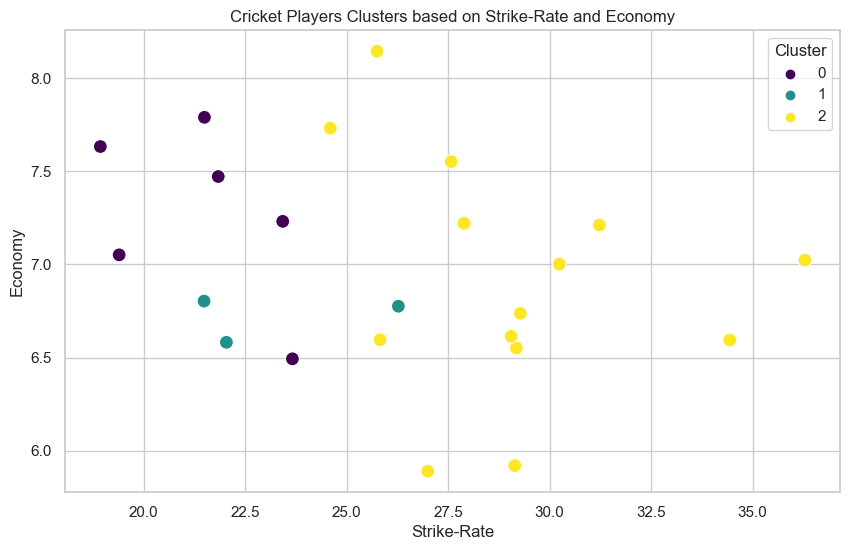

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with 'average' on the x-axis and 'strike_rate' on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='strike_rate', y='economy', hue='Cluster', data=sorted_data, palette='viridis', s=100)

# Set the title and labels of the plot
plt.title('Cricket Players Clusters based on Strike-Rate and Economy')
plt.xlabel('Strike-Rate')
plt.ylabel('Economy')

# Show the plot
plt.legend(title='Cluster')
plt.show()

In [44]:
filtered_sorted_bowling_middle_one_df.columns

Index(['player_name', 'wickets', 'balls_bowled', 'average', 'strike_rate',
       'economy'],
      dtype='object')

In [45]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Normalize the data
scaler = MinMaxScaler()
sorted_data = sorted_data.reset_index(drop=True)
filtered_sorted_bowling_middle_one_df = sorted_data
normalized_data = scaler.fit_transform(filtered_sorted_bowling_middle_one_df[['wickets', 'average', 'strike_rate','economy']])

# Define weights for the composite score
w0 = 0.3
w1 = -0.1
w2 = -0.5
w3 = -0.8
w4 = -0.5


# Create a new column for the composite score
filtered_sorted_bowling_middle_one_df['performance'] = (
    w0 * normalized_data[:, 0] +
    w1 * normalized_data[:, 1] +
    w2 * normalized_data[:, 2] + 
    w3 * normalized_data[:, 3]
)

# Split the data into features and target variable
X = normalized_data
y = filtered_sorted_bowling_middle_one_df["performance"]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(4,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)


print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")

print(f"Test Loss: {loss:.4f}")
print(f"Test MSE: {accuracy:.4f}")

Epoch 1/100
1/1 [==============================] - 1s 569ms/step - loss: 0.2442 - mse: 0.2442
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2117 - mse: 0.2117
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1819 - mse: 0.1819
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1545 - mse: 0.1545
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1298 - mse: 0.1298
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1078 - mse: 0.1078
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0884 - mse: 0.0884
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0716 - mse: 0.0716
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0578 - mse: 0.0578
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 0.0463 - mse: 0.0463
Epoch 11/100
1/1 [==============================] - 0s 26ms/step - loss: 0.03

1/1 [==============================] - 0s 21ms/step


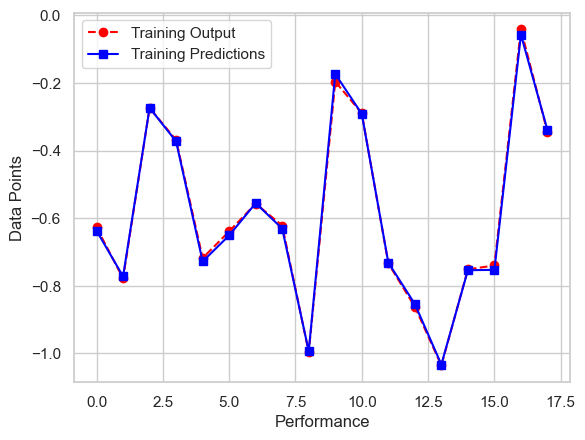

In [46]:
import matplotlib.pyplot as plt
plt.plot(np.array(y_train), label='Training Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(model.predict(X_train)), label='Training Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()

1/1 [==============================] - 0s 18ms/step


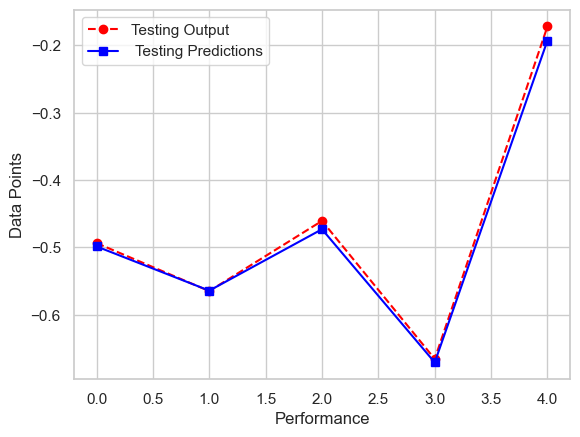

In [47]:
import matplotlib.pyplot as plt
plt.plot(np.array(y_test), label='Testing Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(model.predict(X_test)), label=' Testing Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()

1/1 [==============================] - 0s 17ms/step


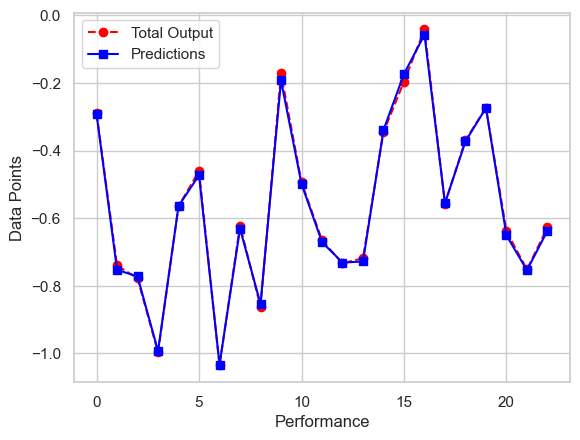

In [48]:
import matplotlib.pyplot as plt
plt.plot(np.array(y), label='Total Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(model.predict(X)), label='Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()

In [49]:
predictions

array([[-0.49855307],
       [-0.56422895],
       [-0.47304937],
       [-0.6708421 ],
       [-0.19284305]], dtype=float32)

In [50]:
len(predictions)

5

In [51]:
output_players_performance = model.predict(X)
print(output_players_performance)

1/1 [==============================] - 0s 20ms/step
[[-0.29182535]
 [-0.7528019 ]
 [-0.77232105]
 [-0.99328274]
 [-0.56422895]
 [-0.47304937]
 [-1.0326949 ]
 [-0.6307834 ]
 [-0.85383993]
 [-0.19284305]
 [-0.49855307]
 [-0.6708421 ]
 [-0.73136574]
 [-0.72806805]
 [-0.33942977]
 [-0.1736501 ]
 [-0.05751454]
 [-0.55568796]
 [-0.37304482]
 [-0.27393633]
 [-0.6508782 ]
 [-0.75395876]
 [-0.6370286 ]]


In [52]:
len(output_players_performance)

23

In [53]:
filtered_sorted_bowling_middle_one_df

,player_name,wickets,balls_bowled,average,strike_rate,economy,Cluster,performance
0,SP Narine,28,816,28.750000,29.142857,5.919118,2,-0.289805
1,DJ Bravo,28,781,33.571429,27.892857,7.221511,2,-0.739972
2,S Nadeem,21,635,35.285714,30.238095,7.001575,2,-0.777934
3,KH Pandya,21,762,42.476190,36.285714,7.023622,2,-0.996595
4,SK Trivedi,22,642,31.863636,29.181818,6.551402,2,-0.564855
5,SK Warne,23,594,28.391304,25.826087,6.595960,2,-0.460626
6,Kuldeep Yadav,24,618,34.958333,25.750000,8.145631,2,-1.035496
7,R Bhatia,25,732,32.880000,29.280000,6.737705,2,-0.621913
8,R Tewatia,20,492,31.700000,24.600000,7.731707,2,-0.861700
9,Rashid Khan,34,918,26.500000,27.000000,5.888889,2,-0.171932


# Best Bowlers In the Middle Part 1

In [54]:
import pandas as pd

# Create a new dataframe from the array
performance_df = pd.DataFrame(output_players_performance, columns=['Actual Performance'])

# Concatenate the two dataframes along the column axis
merged_filtered_sorted_bowling_middle_one_df = pd.concat([filtered_sorted_bowling_middle_one_df, performance_df], axis=1)
merged_filtered_sorted_bowling_middle_one_df = merged_filtered_sorted_bowling_middle_one_df.sort_values('Actual Performance', ascending=False)
merged_filtered_sorted_bowling_middle_one_df = merged_filtered_sorted_bowling_middle_one_df.reset_index(drop=True)
merged_filtered_sorted_bowling_middle_one_df

,player_name,wickets,balls_bowled,average,strike_rate,economy,Cluster,performance,Actual Performance
0,A Mishra,73,1609,24.178082,22.041096,6.581728,1,-0.042061,-0.057515
1,YS Chahal,57,1225,24.368421,21.491228,6.803265,1,-0.196280,-0.173650
2,Rashid Khan,34,918,26.500000,27.000000,5.888889,2,-0.171932,-0.192843
3,PP Ojha,36,852,25.611111,23.666667,6.492958,0,-0.274160,-0.273936
4,SP Narine,28,816,28.750000,29.142857,5.919118,2,-0.289805,-0.291825
5,Harbhajan Singh,58,1524,29.672414,26.275862,6.775591,1,-0.345665,-0.339430
6,KV Sharma,30,582,22.800000,19.400000,7.051546,0,-0.368880,-0.373045
7,SK Warne,23,594,28.391304,25.826087,6.595960,2,-0.460626,-0.473049
8,AR Patel,38,1104,32.026316,29.052632,6.614130,2,-0.493630,-0.498553
9,RD Chahar,32,606,24.093750,18.937500,7.633663,0,-0.557162,-0.555688


# bowling Middle Overs Part 2

In [55]:
bowling_middle_two = []
for i in unique_bowlers:
    bowling_middle_two.append(bowling_stats_overs(i, get_bowler_stats(i), 11, 15))

C:\Users\anubr\AppData\Local\Temp\ipykernel_23804\1093751411.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  average = runs_score/wickets
C:\Users\anubr\AppData\Local\Temp\ipykernel_23804\1093751411.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  strike_rate = balls_bowled/wickets
C:\Users\anubr\AppData\Local\Temp\ipykernel_23804\1093751411.py:16: RuntimeWarning: invalid value encountered in scalar divide
  average = runs_score/wickets
C:\Users\anubr\AppData\Local\Temp\ipykernel_23804\1093751411.py:17: RuntimeWarning: invalid value encountered in scalar divide
  strike_rate = balls_bowled/wickets
C:\Users\anubr\AppData\Local\Temp\ipykernel_23804\1093751411.py:18: RuntimeWarning: invalid value encountered in scalar divide
  economy = (runs_score*6)/balls_bowled


In [56]:
bowling_middle_two

[['Mohammed Shami',
  17,
  318,
  27.235294117647058,
  18.705882352941178,
  8.735849056603774],
 ['Yash Dayal', 1, 24, 49.0, 24.0, 12.25],
 ['LH Ferguson',
  9,
  156,
  23.77777777777778,
  17.333333333333332,
  8.23076923076923],
 ['Rashid Khan',
  55,
  875,
  17.072727272727274,
  15.909090909090908,
  6.438857142857143],
 ['HH Pandya', 16, 352, 32.875, 22.0, 8.965909090909092],
 ['R Sai Kishore', 2, 42, 29.0, 21.0, 8.285714285714286],
 ['TA Boult', 8, 204, 37.75, 25.5, 8.882352941176471],
 ['M Prasidh Krishna', 12, 207, 24.333333333333332, 17.25, 8.46376811594203],
 ['YS Chahal',
  73,
  1016,
  18.273972602739725,
  13.917808219178083,
  7.877952755905512],
 ['OC McCoy', 0, 30, inf, inf, 8.6],
 ['R Ashwin',
  56,
  1220,
  26.839285714285715,
  21.785714285714285,
  7.391803278688524],
 ['Mohammed Siraj', 12, 222, 23.833333333333332, 18.5, 7.72972972972973],
 ['JR Hazlewood', 7, 84, 15.0, 12.0, 7.5],
 ['GJ Maxwell', 8, 264, 47.5, 33.0, 8.636363636363637],
 ['Shahbaz Ahmed', 4,

In [57]:
bowling_middle_two_df = pd.DataFrame(bowling_middle_two, columns=['player_name', 'wickets', 'balls_bowled', 'average', 'strike_rate', 'economy'])
bowling_middle_two_df

,player_name,wickets,balls_bowled,average,strike_rate,economy
0,Mohammed Shami,17,318,27.235294,18.705882,8.735849
1,Yash Dayal,1,24,49.000000,24.000000,12.250000
2,LH Ferguson,9,156,23.777778,17.333333,8.230769
3,Rashid Khan,55,875,17.072727,15.909091,6.438857
4,HH Pandya,16,352,32.875000,22.000000,8.965909
...,...,...,...,...,...,...
467,LPC Silva,0,0,NaN,NaN,NaN
468,D Kalyankrishna,0,30,inf,inf,13.800000
469,SB Joshi,1,36,55.000000,36.000000,9.166667
470,MA Khote,1,18,28.000000,18.000000,9.333333


In [58]:
sorted_bowling_middle_two_df = bowling_middle_two_df.sort_values('wickets', ascending=False)
filtered_sorted_bowling_middle_two_df = sorted_bowling_middle_two_df.query('wickets >= 10').dropna()
print(len(filtered_sorted_bowling_middle_two_df))
filtered_sorted_bowling_middle_two_df

79


,player_name,wickets,balls_bowled,average,strike_rate,economy
8,YS Chahal,73,1016,18.273973,13.917808,7.877953
150,A Mishra,62,1229,25.741935,19.822581,7.791701
146,PP Chawla,61,1229,26.655738,20.147541,7.938161
10,R Ashwin,56,1220,26.839286,21.785714,7.391803
3,Rashid Khan,55,875,17.072727,15.909091,6.438857
...,...,...,...,...,...,...
122,NM Coulter-Nile,10,150,21.200000,15.000000,8.480000
308,BJ Hodge,10,90,12.600000,9.000000,8.400000
93,Mustafizur Rahman,10,228,28.000000,22.800000,7.368421
40,KK Ahmed,10,144,20.100000,14.400000,8.375000


In [59]:
filtered_sorted_bowling_middle_two_df = filtered_sorted_bowling_middle_two_df.reset_index(drop=True)
len(filtered_sorted_bowling_middle_two_df)

79

In [60]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the data
data = filtered_sorted_bowling_middle_two_df
# Handle missing values
data = data.dropna()

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data[['wickets', 'average', 'strike_rate','economy']])

# Create and train the neural network
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(4,)))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse')
model.fit(X, X, epochs=100, batch_size=32, verbose=0)

# Inspect the model's summary to find the correct layer name
model.summary()

encoder = tf.keras.Model(model.input, model.layers[-2].output)
print(encoder)
encoded_data = encoder.predict(X)
print("encoder data")
print(encoded_data)
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(encoded_data)

# Assign the cluster labels back to the original data
data['Cluster'] = labels

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 32)                160       
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_27 (Dense)            (None, 16)                528       
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_28 (Dense)            (None, 8)                 136       
                                                                 
 dropout_8 (Dropout)         (None, 8)                 0         
                                                                 
 dense_29 (Dense)            (None, 1)                

c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [61]:
type(encoded_data)

numpy.ndarray

In [62]:
encoded_data.shape

(79, 8)

In [63]:
# Assuming 'data' is your DataFrame
sorted_data = data.sort_values(by='Cluster', ascending=False)

# Display the sorted DataFrame
sorted_data

,player_name,wickets,balls_bowled,average,strike_rate,economy,Cluster
59,Z Khan,12,319,39.500000,26.583333,8.915361,2
66,JP Faulkner,11,322,41.545455,29.272727,8.515528,2
65,MC Henriques,11,295,38.181818,26.818182,8.542373,2
73,I Sharma,10,330,53.500000,33.000000,9.727273,2
42,KH Pandya,16,474,38.000000,29.625000,7.696203,2
...,...,...,...,...,...,...,...
1,A Mishra,62,1229,25.741935,19.822581,7.791701,0
40,IK Pathan,17,432,35.000000,25.411765,8.263889,0
44,HH Pandya,16,352,32.875000,22.000000,8.965909,0
46,R Vinay Kumar,16,360,32.562500,22.500000,8.683333,0


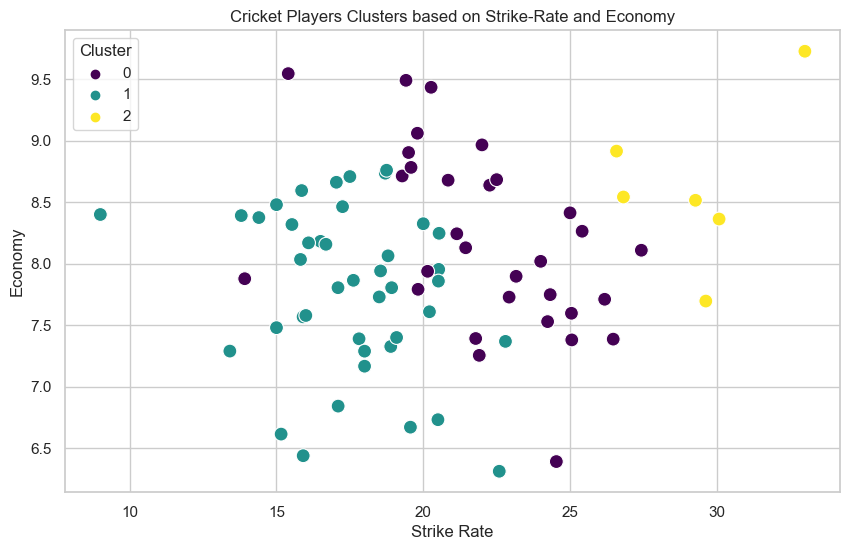

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with 'average' on the x-axis and 'strike_rate' on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='strike_rate', y='economy', hue='Cluster', data=sorted_data, palette='viridis', s=100)

# Set the title and labels of the plot
plt.title('Cricket Players Clusters based on Strike-Rate and Economy')
plt.xlabel('Strike Rate')
plt.ylabel('Economy')

# Show the plot
plt.legend(title='Cluster')
plt.show()

In [65]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Assuming 'data' is your DataFrame and 'X' is the standardized input features
data = filtered_sorted_bowling_middle_two_df
# Handle missing values
data = data.dropna()

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data[['wickets', 'average', 'strike_rate','economy']])
# Define the size of the encoding
encoding_dim = 2  # This is the size of our encoded representations (bottleneck)

# Define the input layer with the same number of neurons as the input features
input_data = Input(shape=(4,))

# "encoded" is the encoded representation of the input
encoded = Dense(32, activation='relu')(input_data)
encoded = Dense(16, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)  # Bottleneck layer

# "decoded" is the lossy reconstruction of the input
decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(4, activation='linear')(decoded)  # Output layer with same size as input

# This model maps an input to its reconstruction
autoencoder = Model(input_data, decoded)

# This model maps an input to its encoded representation
encoder = Model(input_data, encoded)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X, X,
                epochs=100,
                batch_size=32,
                shuffle=True,
                verbose=0)

# Use the encoder to encode the data
encoded_data = encoder.predict(X)

# Apply K-Means clustering on the encoded data
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(encoded_data)

# Assign the cluster labels back to the original DataFrame
data['Cluster'] = labels

3/3 [==============================] - 0s 2ms/step


c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [66]:
# Assuming 'data' is your DataFrame
sorted_data = data.sort_values(by='Cluster', ascending=False)

# Display the sorted DataFrame
sorted_data

,player_name,wickets,balls_bowled,average,strike_rate,economy,Cluster
39,MM Patel,17,228,16.294118,13.411765,7.289474,2
33,B Kumar,18,386,29.055556,21.444444,8.129534,2
36,Mohammed Shami,17,318,27.235294,18.705882,8.735849,2
43,Iqbal Abdulla,16,285,21.937500,17.812500,7.389474,2
44,HH Pandya,16,352,32.875000,22.000000,8.965909,2
...,...,...,...,...,...,...,...
16,M Muralitharan,28,529,23.071429,18.892857,7.327032,0
59,Z Khan,12,319,39.500000,26.583333,8.915361,0
17,R Bhatia,28,733,33.642857,26.178571,7.710778,0
57,YK Pathan,13,391,41.923077,30.076923,8.363171,0


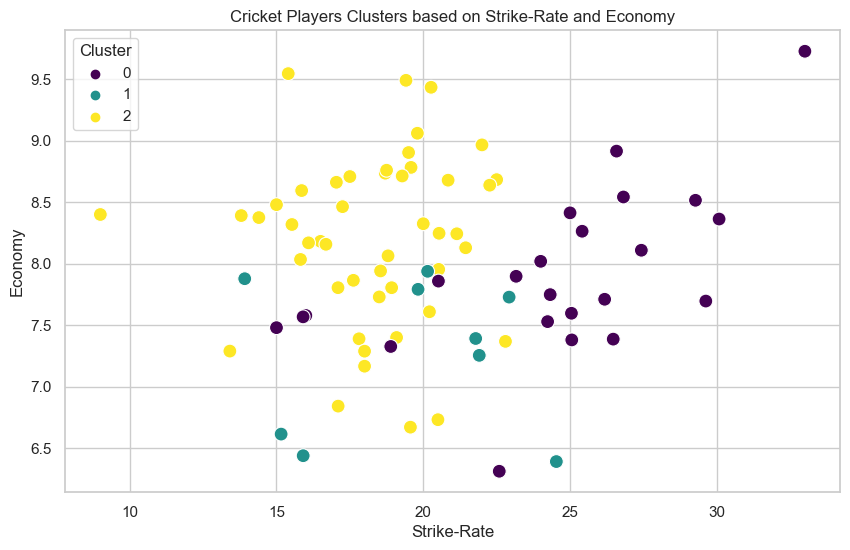

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with 'average' on the x-axis and 'strike_rate' on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='strike_rate', y='economy', hue='Cluster', data=sorted_data, palette='viridis', s=100)

# Set the title and labels of the plot
plt.title('Cricket Players Clusters based on Strike-Rate and Economy')
plt.xlabel('Strike-Rate')
plt.ylabel('Economy')

# Show the plot
plt.legend(title='Cluster')
plt.show()

In [68]:
filtered_sorted_bowling_middle_two_df.columns

Index(['player_name', 'wickets', 'balls_bowled', 'average', 'strike_rate',
       'economy'],
      dtype='object')

In [69]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Normalize the data
scaler = MinMaxScaler()
sorted_data = sorted_data.reset_index(drop=True)
filtered_sorted_bowling_middle_two_df = sorted_data
normalized_data = scaler.fit_transform(filtered_sorted_bowling_middle_two_df[['wickets', 'average', 'strike_rate','economy']])

# Define weights for the composite score
w0 = 0.2
w1 = -0.1
w2 = -0.5
w3 = -0.6


# Create a new column for the composite score
filtered_sorted_bowling_middle_two_df['performance'] = (
    w0 * normalized_data[:, 0] +
    w1 * normalized_data[:, 1] +
    w2 * normalized_data[:, 2] + 
    w3 * normalized_data[:, 3]
)

# Split the data into features and target variable
X = normalized_data
y = filtered_sorted_bowling_middle_two_df["performance"]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(4,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)


print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")

print(f"Test Loss: {loss:.4f}")
print(f"Test MSE: {accuracy:.4f}")

Epoch 1/100
2/2 [==============================] - 1s 3ms/step - loss: 0.2463 - mse: 0.2463
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 0.1891 - mse: 0.1891
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 0.1395 - mse: 0.1395
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0979 - mse: 0.0979
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0653 - mse: 0.0653
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0399 - mse: 0.0399
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0233 - mse: 0.0233
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0138 - mse: 0.0138
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0109 - mse: 0.0109
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0123 - mse: 0.0123
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0150 

2/2 [==============================] - 0s 2ms/step


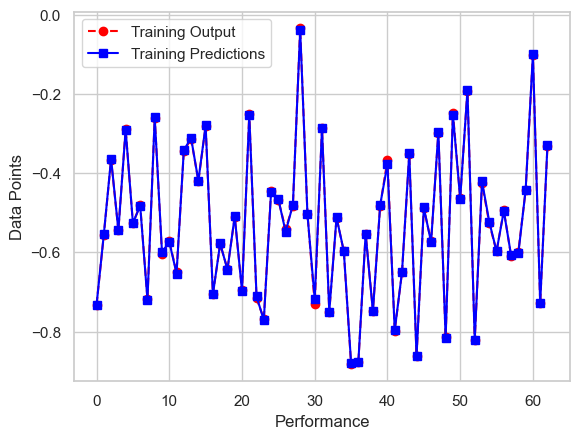

In [70]:
import matplotlib.pyplot as plt
plt.plot(np.array(y_train), label='Training Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(model.predict(X_train)), label='Training Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()

1/1 [==============================] - 0s 18ms/step


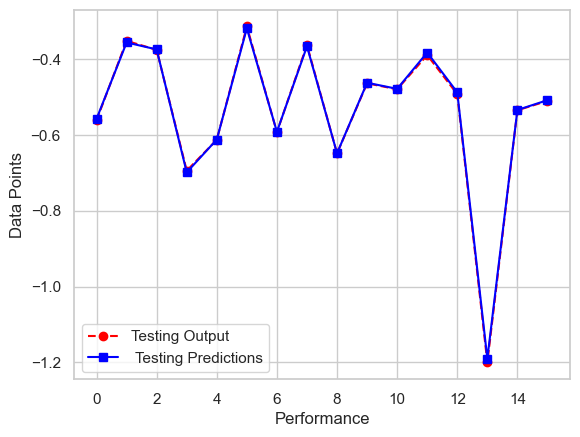

In [71]:
import matplotlib.pyplot as plt
plt.plot(np.array(y_test), label='Testing Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(model.predict(X_test)), label=' Testing Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()

3/3 [==============================] - 0s 2ms/step


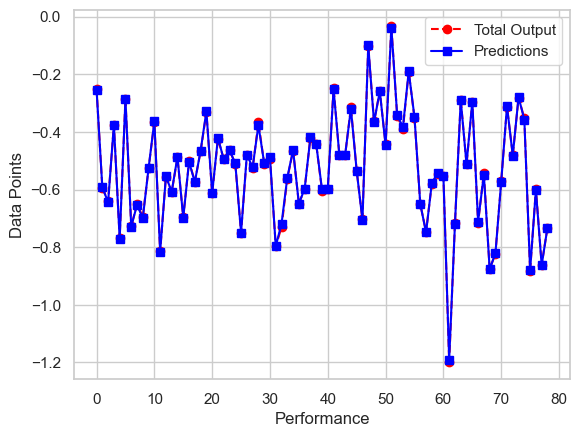

In [72]:
import matplotlib.pyplot as plt
plt.plot(np.array(y), label='Total Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(model.predict(X)), label='Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()

In [73]:
predictions

array([[-0.5585176 ],
       [-0.35709998],
       [-0.37544906],
       [-0.69915026],
       [-0.6128384 ],
       [-0.31981334],
       [-0.59262526],
       [-0.36717194],
       [-0.6490975 ],
       [-0.46318206],
       [-0.4792728 ],
       [-0.38361546],
       [-0.48851857],
       [-1.1899744 ],
       [-0.5348672 ],
       [-0.5090914 ]], dtype=float32)

In [74]:
len(predictions)

16

In [75]:
output_players_performance = model.predict(X)
print(output_players_performance)

3/3 [==============================] - 0s 2ms/step
[[-0.25301436]
 [-0.59262526]
 [-0.6439792 ]
 [-0.37544906]
 [-0.77111536]
 [-0.28658894]
 [-0.72870624]
 [-0.6533262 ]
 [-0.69915026]
 [-0.5260188 ]
 [-0.3631218 ]
 [-0.8159667 ]
 [-0.5545757 ]
 [-0.60743773]
 [-0.48647514]
 [-0.6979911 ]
 [-0.50410545]
 [-0.5742187 ]
 [-0.46552232]
 [-0.32861653]
 [-0.6128384 ]
 [-0.4202148 ]
 [-0.49550536]
 [-0.46415174]
 [-0.5090914 ]
 [-0.74938524]
 [-0.47954717]
 [-0.5226635 ]
 [-0.37708578]
 [-0.5082325 ]
 [-0.4885186 ]
 [-0.79678607]
 [-0.7186503 ]
 [-0.5585176 ]
 [-0.46318206]
 [-0.6490975 ]
 [-0.59722084]
 [-0.41901898]
 [-0.44235268]
 [-0.59968966]
 [-0.59690434]
 [-0.25206885]
 [-0.4792728 ]
 [-0.47987023]
 [-0.31981334]
 [-0.5348672 ]
 [-0.70588875]
 [-0.09964079]
 [-0.36717194]
 [-0.25899798]
 [-0.44655725]
 [-0.0380164 ]
 [-0.34181216]
 [-0.38361546]
 [-0.19026756]
 [-0.34917012]
 [-0.6499129 ]
 [-0.7490203 ]
 [-0.5774429 ]
 [-0.54434454]
 [-0.5532225 ]
 [-1.1899744 ]
 [-0.71948504]
 [-0

In [76]:
len(output_players_performance)

79

In [77]:
filtered_sorted_bowling_middle_two_df

,player_name,wickets,balls_bowled,average,strike_rate,economy,Cluster,performance
0,MM Patel,17,228,16.294118,13.411765,7.289474,2,-0.250383
1,B Kumar,18,386,29.055556,21.444444,8.129534,2,-0.593362
2,Mohammed Shami,17,318,27.235294,18.705882,8.735849,2,-0.641567
3,Iqbal Abdulla,16,285,21.937500,17.812500,7.389474,2,-0.376608
4,HH Pandya,16,352,32.875000,22.000000,8.965909,2,-0.767581
...,...,...,...,...,...,...,...,...
74,M Muralitharan,28,529,23.071429,18.892857,7.327032,0,-0.352821
75,Z Khan,12,319,39.500000,26.583333,8.915361,0,-0.883082
76,R Bhatia,28,733,33.642857,26.178571,7.710778,0,-0.597881
77,YK Pathan,13,391,41.923077,30.076923,8.363171,0,-0.861591


# Best Bowlers In the Middle Part 2

In [78]:
import pandas as pd

# Create a new dataframe from the array
performance_df = pd.DataFrame(output_players_performance, columns=['Actual Performance'])

# Concatenate the two dataframes along the column axis
merged_filtered_sorted_bowling_middle_two_df = pd.concat([filtered_sorted_bowling_middle_two_df, performance_df], axis=1)
merged_filtered_sorted_bowling_middle_two_df = merged_filtered_sorted_bowling_middle_two_df.sort_values('Actual Performance', ascending=False)
merged_filtered_sorted_bowling_middle_two_df = merged_filtered_sorted_bowling_middle_two_df.reset_index(drop=True)
merged_filtered_sorted_bowling_middle_two_df

,player_name,wickets,balls_bowled,average,strike_rate,economy,Cluster,performance,Actual Performance
0,Rashid Khan,55,875,17.072727,15.909091,6.438857,1,-0.034220,-0.038016
1,JJ Bumrah,38,576,16.710526,15.157895,6.614583,1,-0.102529,-0.099641
2,YS Chahal,73,1016,18.273973,13.917808,7.877953,1,-0.191388,-0.190268
3,CV Varun,20,342,19.500000,17.100000,6.842105,2,-0.246930,-0.252069
4,MM Patel,17,228,16.294118,13.411765,7.289474,2,-0.250383,-0.253014
...,...,...,...,...,...,...,...,...,...
74,MC Henriques,11,295,38.181818,26.818182,8.542373,0,-0.822389,-0.821900
75,YK Pathan,13,391,41.923077,30.076923,8.363171,0,-0.861591,-0.862320
76,JP Faulkner,11,322,41.545455,29.272727,8.515528,0,-0.877033,-0.876149
77,Z Khan,12,319,39.500000,26.583333,8.915361,0,-0.883082,-0.879556


# bowling death Overs

In [79]:
bowling_death = []
for i in unique_bowlers:
    bowling_death.append(bowling_stats_overs(i, get_bowler_stats(i), 16, 19))

C:\Users\anubr\AppData\Local\Temp\ipykernel_23804\1093751411.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  average = runs_score/wickets
C:\Users\anubr\AppData\Local\Temp\ipykernel_23804\1093751411.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  strike_rate = balls_bowled/wickets
C:\Users\anubr\AppData\Local\Temp\ipykernel_23804\1093751411.py:16: RuntimeWarning: invalid value encountered in scalar divide
  average = runs_score/wickets
C:\Users\anubr\AppData\Local\Temp\ipykernel_23804\1093751411.py:17: RuntimeWarning: invalid value encountered in scalar divide
  strike_rate = balls_bowled/wickets
C:\Users\anubr\AppData\Local\Temp\ipykernel_23804\1093751411.py:18: RuntimeWarning: invalid value encountered in scalar divide
  economy = (runs_score*6)/balls_bowled


In [80]:
bowling_death

[['Mohammed Shami', 50, 482, 17.38, 9.64, 10.817427385892117],
 ['Yash Dayal', 3, 54, 26.666666666666668, 18.0, 8.88888888888889],
 ['LH Ferguson', 10, 207, 36.3, 20.7, 10.521739130434783],
 ['Rashid Khan', 14, 210, 17.928571428571427, 15.0, 7.171428571428572],
 ['HH Pandya', 16, 154, 18.625, 9.625, 11.61038961038961],
 ['R Sai Kishore', 1, 6, 16.0, 6.0, 16.0],
 ['TA Boult',
  39,
  481,
  22.23076923076923,
  12.333333333333334,
  10.814968814968815],
 ['M Prasidh Krishna', 20, 308, 28.45, 15.4, 11.084415584415584],
 ['YS Chahal', 20, 229, 19.35, 11.45, 10.139737991266376],
 ['OC McCoy', 8, 59, 10.5, 7.375, 8.542372881355933],
 ['R Ashwin', 16, 283, 24.5625, 17.6875, 8.332155477031803],
 ['Mohammed Siraj',
  24,
  356,
  25.916666666666668,
  14.833333333333334,
  10.48314606741573],
 ['JR Hazlewood', 12, 135, 18.916666666666668, 11.25, 10.088888888888889],
 ['GJ Maxwell', 2, 18, 10.0, 9.0, 6.666666666666667],
 ['Shahbaz Ahmed', 4, 12, 1.75, 3.0, 3.5],
 ['HV Patel',
  41,
  415,
  16.

In [81]:
bowling_death_df = pd.DataFrame(bowling_death, columns=['player_name', 'wickets', 'balls_bowled', 'average', 'strike_rate', 'economy'])
bowling_death_df

,player_name,wickets,balls_bowled,average,strike_rate,economy
0,Mohammed Shami,50,482,17.380000,9.640,10.817427
1,Yash Dayal,3,54,26.666667,18.000,8.888889
2,LH Ferguson,10,207,36.300000,20.700,10.521739
3,Rashid Khan,14,210,17.928571,15.000,7.171429
4,HH Pandya,16,154,18.625000,9.625,11.610390
...,...,...,...,...,...,...
467,LPC Silva,0,6,inf,inf,21.000000
468,D Kalyankrishna,0,0,NaN,NaN,NaN
469,SB Joshi,0,1,inf,inf,24.000000
470,MA Khote,1,12,23.000000,12.000,11.500000


In [82]:
sorted_bowling_death_df = bowling_death_df.sort_values('wickets', ascending=False)
filtered_sorted_bowling_death_df = sorted_bowling_death_df.query('wickets >= 10').dropna()
print(len(filtered_sorted_bowling_death_df))
filtered_sorted_bowling_death_df

95


,player_name,wickets,balls_bowled,average,strike_rate,economy
72,DJ Bravo,102,1115,17.745098,10.931373,9.739910
177,SL Malinga,90,917,13.288889,10.188889,7.825518
28,B Kumar,77,999,19.909091,12.974026,9.207207
36,JJ Bumrah,70,1026,21.000000,14.657143,8.596491
56,SP Narine,55,703,16.800000,12.781818,7.886202
...,...,...,...,...,...,...
160,BA Stokes,11,162,25.181818,14.727273,10.259259
19,KH Pandya,11,70,7.636364,6.363636,7.200000
99,CJ Jordan,11,200,35.818182,18.181818,11.820000
2,LH Ferguson,10,207,36.300000,20.700000,10.521739


In [83]:
filtered_sorted_bowling_death_df = filtered_sorted_bowling_death_df.reset_index(drop=True)
len(filtered_sorted_bowling_death_df)

95

In [84]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the data
data = filtered_sorted_bowling_death_df
# Handle missing values
data = data.dropna()

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data[['wickets', 'balls_bowled', 'average', 'strike_rate','economy']])

# Create and train the neural network
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(5,)))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse')
model.fit(X, X, epochs=100, batch_size=32, verbose=0)

# Inspect the model's summary to find the correct layer name
model.summary()

encoder = tf.keras.Model(model.input, model.layers[-2].output)
print(encoder)
encoded_data = encoder.predict(X)
print("encoder data")
print(encoded_data)
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(encoded_data)

# Assign the cluster labels back to the original data
data['Cluster'] = labels

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 32)                192       
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_40 (Dense)            (None, 16)                528       
                                                                 
 dropout_10 (Dropout)        (None, 16)                0         
                                                                 
 dense_41 (Dense)            (None, 8)                 136       
                                                                 
 dropout_11 (Dropout)        (None, 8)                 0         
                                                                 
 dense_42 (Dense)            (None, 1)                

c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [85]:
type(encoded_data)

numpy.ndarray

In [86]:
encoded_data.shape

(95, 8)

In [87]:
# Assuming 'data' is your DataFrame
sorted_data = data.sort_values(by='Cluster', ascending=False)

# Display the sorted DataFrame
sorted_data

,player_name,wickets,balls_bowled,average,strike_rate,economy,Cluster
0,DJ Bravo,102,1115,17.745098,10.931373,9.739910,2
29,IK Pathan,26,393,23.307692,15.115385,9.251908,2
32,M Morkel,25,336,20.840000,13.440000,9.303571,2
33,Mohammed Siraj,24,356,25.916667,14.833333,10.483146,2
34,AB Dinda,24,394,30.666667,16.416667,11.208122,2
...,...,...,...,...,...,...,...
62,PP Ojha,16,170,16.250000,10.625000,9.176471,0
65,KK Cooper,16,246,22.000000,15.375000,8.585366,0
66,SK Trivedi,16,212,21.250000,13.250000,9.622642,0
67,HH Pandya,16,154,18.625000,9.625000,11.610390,0


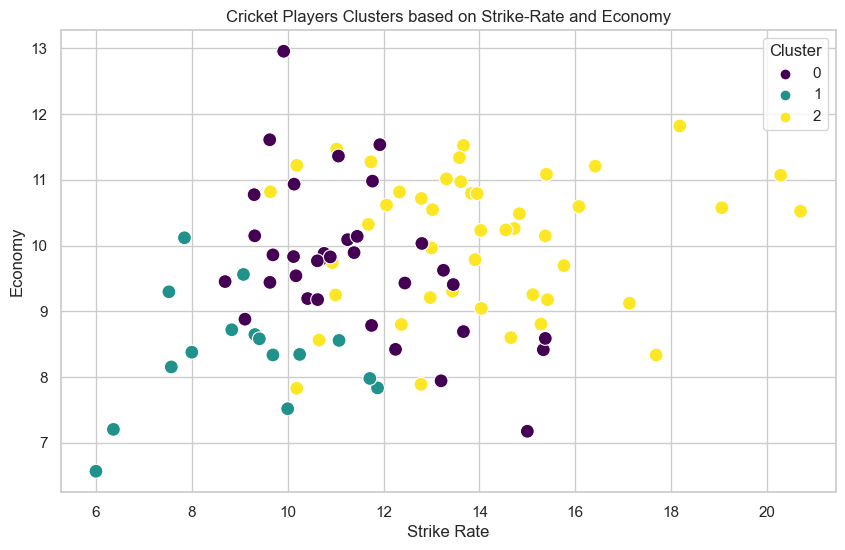

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with 'average' on the x-axis and 'strike_rate' on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='strike_rate', y='economy', hue='Cluster', data=sorted_data, palette='viridis', s=100)

# Set the title and labels of the plot
plt.title('Cricket Players Clusters based on Strike-Rate and Economy')
plt.xlabel('Strike Rate')
plt.ylabel('Economy')

# Show the plot
plt.legend(title='Cluster')
plt.show()

In [89]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Assuming 'data' is your DataFrame and 'X' is the standardized input features
data = filtered_sorted_bowling_death_df
# Handle missing values
data = data.dropna()

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data[['wickets', 'average', 'strike_rate','economy']])
# Define the size of the encoding
encoding_dim = 2  # This is the size of our encoded representations (bottleneck)

# Define the input layer with the same number of neurons as the input features
input_data = Input(shape=(4,))

# "encoded" is the encoded representation of the input
encoded = Dense(32, activation='relu')(input_data)
encoded = Dense(16, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)  # Bottleneck layer

# "decoded" is the lossy reconstruction of the input
decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(4, activation='linear')(decoded)  # Output layer with same size as input

# This model maps an input to its reconstruction
autoencoder = Model(input_data, decoded)

# This model maps an input to its encoded representation
encoder = Model(input_data, encoded)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X, X,
                epochs=100,
                batch_size=32,
                shuffle=True,
                verbose=0)

# Use the encoder to encode the data
encoded_data = encoder.predict(X)

# Apply K-Means clustering on the encoded data
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(encoded_data)

# Assign the cluster labels back to the original DataFrame
data['Cluster'] = labels

3/3 [==============================] - 0s 2ms/step


c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [90]:
# Assuming 'data' is your DataFrame
sorted_data = data.sort_values(by='Cluster', ascending=False)

# Display the sorted DataFrame
sorted_data

,player_name,wickets,balls_bowled,average,strike_rate,economy,Cluster
41,DE Bollinger,21,210,12.523810,10.000000,7.514286,2
71,A Kumble,14,106,10.285714,7.571429,8.150943,2
91,KH Pandya,11,70,7.636364,6.363636,7.200000,2
63,Sohail Tanvir,16,96,6.562500,6.000000,6.562500,2
87,Kuldeep Yadav,12,96,11.166667,8.000000,8.375000,2
...,...,...,...,...,...,...,...
69,A Nortje,15,198,17.466667,13.200000,7.939394,0
1,SL Malinga,90,917,13.288889,10.188889,7.825518,0
72,Rashid Khan,14,210,17.928571,15.000000,7.171429,0
73,WD Parnell,14,164,15.571429,11.714286,7.975610,0


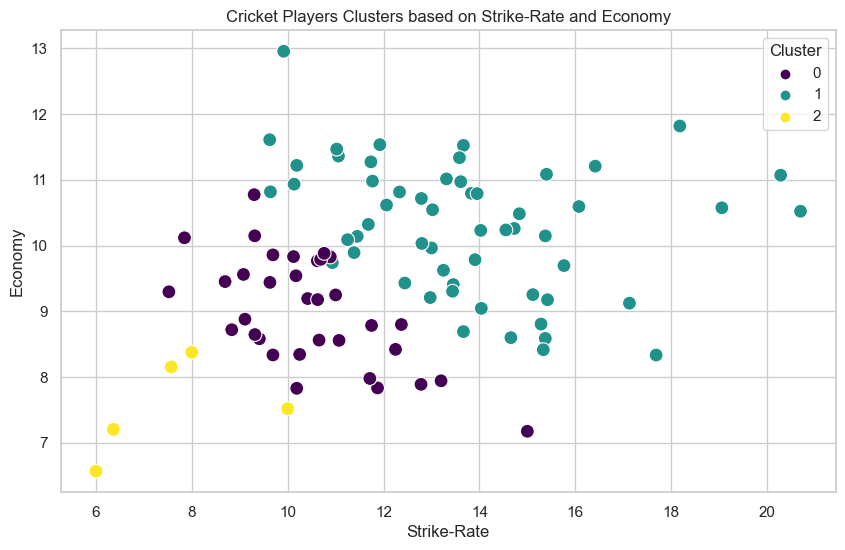

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with 'average' on the x-axis and 'strike_rate' on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='strike_rate', y='economy', hue='Cluster', data=sorted_data, palette='viridis', s=100)

# Set the title and labels of the plot
plt.title('Cricket Players Clusters based on Strike-Rate and Economy')
plt.xlabel('Strike-Rate')
plt.ylabel('Economy')

# Show the plot
plt.legend(title='Cluster')
plt.show()

In [92]:
filtered_sorted_bowling_death_df.columns

Index(['player_name', 'wickets', 'balls_bowled', 'average', 'strike_rate',
       'economy'],
      dtype='object')

In [93]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Normalize the data
scaler = MinMaxScaler()
sorted_data = sorted_data.reset_index(drop=True)
filtered_sorted_bowling_death_df = sorted_data
normalized_data = scaler.fit_transform(filtered_sorted_bowling_death_df[['wickets', 'average', 'strike_rate','economy']])

# Define weights for the composite score
w0 = 0.2
w1 = -0.1
w2 = -0.5
w3 = -0.3


# Create a new column for the composite score
filtered_sorted_bowling_death_df['performance'] = (
    w0 * normalized_data[:, 0] +
    w1 * normalized_data[:, 1] +
    w2 * normalized_data[:, 2] + 
    w3 * normalized_data[:, 3]

)

# Split the data into features and target variable
X = normalized_data
y = filtered_sorted_bowling_death_df["performance"]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(4,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)


print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")

print(f"Test Loss: {loss:.4f}")
print(f"Test MSE: {accuracy:.4f}")

Epoch 1/100
3/3 [==============================] - 1s 2ms/step - loss: 0.1168 - mse: 0.1168
Epoch 2/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0713 - mse: 0.0713
Epoch 3/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0370 - mse: 0.0370
Epoch 4/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0154 - mse: 0.0154
Epoch 5/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0075 - mse: 0.0075
Epoch 6/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0071 - mse: 0.0071
Epoch 7/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0096 - mse: 0.0096
Epoch 8/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0096 - mse: 0.0096
Epoch 9/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0071 - mse: 0.0071
Epoch 10/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0039 - mse: 0.0039
Epoch 11/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0024 

3/3 [==============================] - 0s 1ms/step


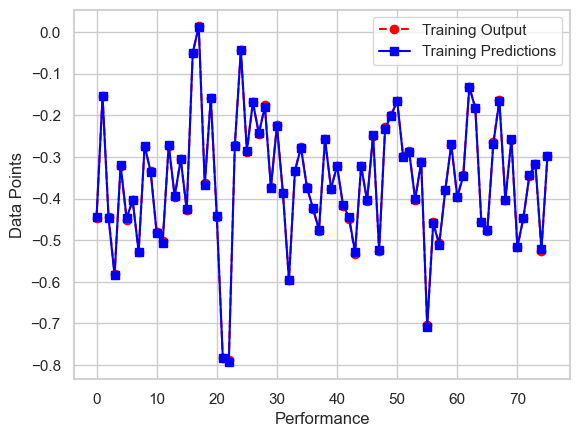

In [94]:
import matplotlib.pyplot as plt
plt.plot(np.array(y_train), label='Training Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(model.predict(X_train)), label='Training Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()

1/1 [==============================] - 0s 20ms/step


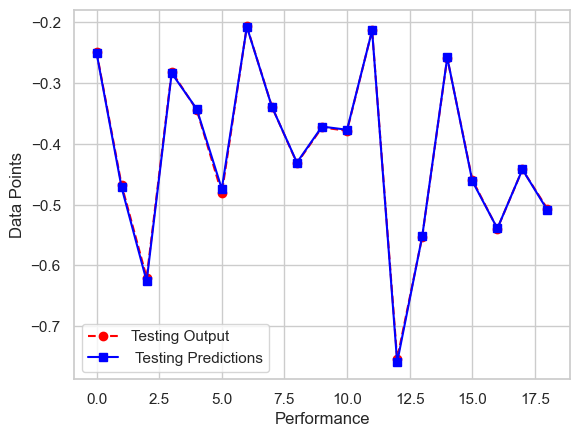

In [95]:
import matplotlib.pyplot as plt
plt.plot(np.array(y_test), label='Testing Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(model.predict(X_test)), label=' Testing Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()

3/3 [==============================] - 0s 2ms/step


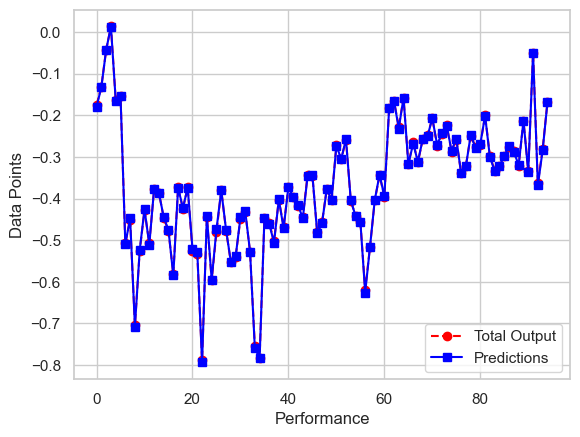

In [96]:
import matplotlib.pyplot as plt
plt.plot(np.array(y), label='Total Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(model.predict(X)), label='Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()

In [97]:
predictions

array([[-0.25022253],
       [-0.47170815],
       [-0.62575346],
       [-0.28370312],
       [-0.34268692],
       [-0.47407994],
       [-0.20745869],
       [-0.33895448],
       [-0.43062845],
       [-0.3714689 ],
       [-0.3767682 ],
       [-0.2134296 ],
       [-0.75948685],
       [-0.55210215],
       [-0.2576516 ],
       [-0.46108463],
       [-0.5391584 ],
       [-0.44205603],
       [-0.50909144]], dtype=float32)

In [98]:
len(predictions)

19

In [99]:
output_players_performance = model.predict(X)
print(output_players_performance)

3/3 [==============================] - 0s 2ms/step
[[-0.17992955]
 [-0.13284779]
 [-0.04363462]
 [ 0.01277179]
 [-0.16502249]
 [-0.15375113]
 [-0.5090914 ]
 [-0.44761008]
 [-0.70760334]
 [-0.523807  ]
 [-0.42595008]
 [-0.5105485 ]
 [-0.3767682 ]
 [-0.3864277 ]
 [-0.4446759 ]
 [-0.4761945 ]
 [-0.5843641 ]
 [-0.37395564]
 [-0.42285964]
 [-0.3738081 ]
 [-0.5214737 ]
 [-0.5285309 ]
 [-0.79357415]
 [-0.44213855]
 [-0.5949367 ]
 [-0.47407994]
 [-0.38071474]
 [-0.47505215]
 [-0.55210215]
 [-0.5391584 ]
 [-0.44523177]
 [-0.43062848]
 [-0.52734464]
 [-0.75948685]
 [-0.78251773]
 [-0.44637576]
 [-0.46108463]
 [-0.5059877 ]
 [-0.40238538]
 [-0.47170815]
 [-0.3714689 ]
 [-0.39672285]
 [-0.41548422]
 [-0.44752267]
 [-0.34585258]
 [-0.34364268]
 [-0.48326877]
 [-0.4598412 ]
 [-0.3767179 ]
 [-0.40423408]
 [-0.27288637]
 [-0.30535117]
 [-0.2576516 ]
 [-0.40436247]
 [-0.44205603]
 [-0.45531887]
 [-0.62575346]
 [-0.517057  ]
 [-0.40358356]
 [-0.34268692]
 [-0.39506474]
 [-0.18273267]
 [-0.16488385]
 [-0

In [100]:
len(output_players_performance)

95

In [101]:
filtered_sorted_bowling_death_df

,player_name,wickets,balls_bowled,average,strike_rate,economy,Cluster,performance
0,DE Bollinger,21,210,12.523810,10.000000,7.514286,2,-0.176101
1,A Kumble,14,106,10.285714,7.571429,8.150943,2,-0.131328
2,KH Pandya,11,70,7.636364,6.363636,7.200000,2,-0.043578
3,Sohail Tanvir,16,96,6.562500,6.000000,6.562500,2,0.013043
4,Kuldeep Yadav,12,96,11.166667,8.000000,8.375000,2,-0.163617
...,...,...,...,...,...,...,...,...
90,A Nortje,15,198,17.466667,13.200000,7.939394,0,-0.333943
91,SL Malinga,90,917,13.288889,10.188889,7.825518,0,-0.049604
92,Rashid Khan,14,210,17.928571,15.000000,7.171429,0,-0.362814
93,WD Parnell,14,164,15.571429,11.714286,7.975610,0,-0.281141


# Best Bowlers In the Death

In [102]:
import pandas as pd

# Create a new dataframe from the array
performance_df = pd.DataFrame(output_players_performance, columns=['Actual Performance'])

# Concatenate the two dataframes along the column axis
merged_filtered_sorted_bowling_death_df = pd.concat([filtered_sorted_bowling_death_df, performance_df], axis=1)
merged_filtered_sorted_bowling_death_df = merged_filtered_sorted_bowling_death_df.sort_values('Actual Performance', ascending=False)
merged_filtered_sorted_bowling_death_df = merged_filtered_sorted_bowling_death_df.reset_index(drop=True)
merged_filtered_sorted_bowling_death_df

,player_name,wickets,balls_bowled,average,strike_rate,economy,Cluster,performance,Actual Performance
0,Sohail Tanvir,16,96,6.562500,6.000000,6.562500,2,0.013043,0.012772
1,KH Pandya,11,70,7.636364,6.363636,7.200000,2,-0.043578,-0.043635
2,SL Malinga,90,917,13.288889,10.188889,7.825518,0,-0.049604,-0.050539
3,A Kumble,14,106,10.285714,7.571429,8.150943,2,-0.131328,-0.132848
4,DJ Bravo,102,1115,17.745098,10.931373,9.739910,1,-0.153009,-0.153751
...,...,...,...,...,...,...,...,...,...
90,AB Dinda,24,394,30.666667,16.416667,11.208122,1,-0.619884,-0.625753
91,TG Southee,17,324,33.588235,19.058824,10.574074,1,-0.704694,-0.707603
92,CJ Jordan,11,200,35.818182,18.181818,11.820000,1,-0.753576,-0.759487
93,LH Ferguson,10,207,36.300000,20.700000,10.521739,1,-0.782064,-0.782518
